# Lab3

In [2]:
import requests
import json
from selenium import webdriver
from lxml import etree
import time
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #词形变化
from sklearn.feature_extraction.text import CountVectorizer  

os.chdir("E:/graduate/class/Statistical Case Studies/homework3/xinhua_news/")

### 1.爬取新华网Business - Finance类别的新闻url

In [5]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36 Core/1.47.933.400 QQBrowser/9.4.8699.400',
}
url = 'http://qc.wa.news.cn/nodeart/list?nid=11143416&pgnum=1&cnt=50&tp=1&orderby=1?callback=jQuery111307913713753952403_1522322711817&_=1522322711818'

data = requests.get(url, headers=headers)
data.encoding
html=data.content
dic_html = html[42:(len(html)-2)] #提取json文本
url_num = len(json.loads(dic_html)["data"]["list"]);url_num  #50条url
def geturls(i):
    return json.loads(dic_html)["data"]["list"][i]["LinkUrl"]
new_urls = map(geturls,range(url_num))
for i in new_urls[:10]:
    print i

http://www.xinhuanet.com/english/2018-03/30/c_137076591.htm
http://www.xinhuanet.com/english/2018-03/30/c_137076569.htm
http://www.xinhuanet.com/english/2018-03/30/c_137076516.htm
http://www.xinhuanet.com/english/2018-03/30/c_137076517.htm
http://www.xinhuanet.com/english/2018-03/29/c_137074965.htm
http://www.xinhuanet.com/english/2018-03/29/c_137074813.htm
http://www.xinhuanet.com/english/2018-03/29/c_137074783.htm
http://www.xinhuanet.com/english/2018-03/29/c_137074673.htm
http://www.xinhuanet.com/english/2018-03/29/c_137074641.htm
http://www.xinhuanet.com/english/2018-03/29/c_137074003.htm


### 2.对每个url，爬取新闻标题及内容
- 每条新闻保存在每个txt中

In [ ]:
driver = webdriver.PhantomJS(executable_path=r'C:/Users/situ/Downloads/phantomjs-2.1.1-windows/bin/phantomjs.exe')
time.sleep(5)
i=0
for url in new_urls:
    i=i+1
    driver.get(url)
    time.sleep(1)
    page = driver.page_source
    selector = etree.HTML(page) 
    try:
        text = "\n".join(selector.xpath('/html/body/div[5]/div[1]/div[5]/p/text()')).strip()   
        if text=="":
            text = "".join(selector.xpath('//*[@id="Zoom"]//text()')).strip()
        if text=="":
            text = "\n".join(selector.xpath('/html/body/div[5]/div[5]/p/text()')).strip()    
    except:
        text = ""
    try:
        title = selector.xpath("/html/body/div[5]/div[1]/h1/text()")[0].strip()
    except:
        try:
            title = selector.xpath("/html/body/div[5]/h1/text()")[0].strip()
        except:
            try:
                title = selector.xpath("/html/body/div[3]/table[2]/tbody/tr/td[2]/table[1]/tbody/tr/td/table[1]/tbody/tr/td/table[2]/tbody/tr[1]/td/text()")[0].strip()
            except:
                title = "none"
    if (text!="") & (title!="none"):
        try:
            with open(title+".txt","w") as f:
                f.write(text)
            print i #第几条url写出来了
        except:
            pass
        

### 爬取的新闻



![](./pictures/news.jpg)

### 3.批量读取新闻文本txt
- 新闻文本示例

In [8]:
with open("Dollar hovers in upper 106 yen amid easing geopolitical concerns.txt","r") as onefile:
    for line in onefile.readlines():
        print line

TOKYO, March 29 (Xinhua) -- The U.S. dollar hovered in the upper 106 yen zone Thursday in Tokyo amid easing concerns over the Korean Peninsula issue.

At 5:00 p.m., the dollar was quoted at 106.57-58 yen compared with 106.80-90 yen in New York and 105.46-48 yen in Tokyo at 5:00 p.m. Wednesday. It moved between 106.38 yen and 106.93 yen during the day.

The euro was quoted at 1.2309-2310 dollars and 131.18-22 yen against 1.2304-2314 dollars and 131.43-53 yen in New York and 1.2398-2399 dollars and 130.75-79 yen in Tokyo late Wednesday afternoon.


- 批量保存在dataframe中，一列为标题，一列为内容

In [3]:
def batch_read_txt(filepath):
    filenames = os.listdir(filepath)      #获取当前路径下的文件名，返回List
    l = len(filenames)
    title = [s.split(".")[0] for s in filenames]
    news = pd.DataFrame({"title":title,"content":np.zeros(l)})
    for i in range(l):
        f = filenames[i]
        full_filenames=os.path.join(filepath,f)     #将文件命加入到当前文件路径后面
        with open(full_filenames,"r") as f2:
            text = "".join(f2.readlines())
            news["content"][i] = text.split(" -- ")[1]
    return news
os.chdir("E:/graduate/class/Statistical Case Studies/homework3/xinhua_news/")
news = batch_read_txt(os.getcwd())
news.head(5)

C:\Users\situ\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\situ\Anaconda2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,content,title
0,China will host the 2019 Inter-American Develo...,2019 IADB meeting of board of governors to be ...
1,China's Hushen 300 index futures opened higher...,China Hushen 300 index futures open higher Thu...
2,China's Hushen 300 index futures opened mixed ...,China Hushen 300 index futures open mixed Monday
3,China on Monday launched trading of the yuan-d...,China launches crude oil futures trading
4,China's treasury bond futures closed lower on ...,China treasury bond futures close lower Tuesday


### 4.文本预处理
- 去除数字、非英文字符、停用词、转换成小写、词形还原

In [4]:
wnl = WordNetLemmatizer()
def clean_text(text):
    text = text.encode("utf-8").decode("utf-8")
    text = re.sub("\d","",text)
    text_seg = [re.sub(u'\W', "", i) for i in nltk.word_tokenize(text)] 
    space_len = text_seg.count(u"")
    for i in range(space_len):
        text_seg.remove(u'')
    filtered = [w.lower() for w in text_seg if w not in stopwords.words('english') and 3<=len(w)] 
    lemmatized= [wnl.lemmatize(w) for w in filtered] #词形还原
    return " ".join(lemmatized)

news["clean_text"] = map(clean_text,news["content"])
news.head(5)

,content,title,clean_text
0,China will host the 2019 Inter-American Develo...,2019 IADB meeting of board of governors to be ...,china host interamerican development bank idb ...
1,China's Hushen 300 index futures opened higher...,China Hushen 300 index futures open higher Thu...,china hushen index future opened higher thursd...
2,China's Hushen 300 index futures opened mixed ...,China Hushen 300 index futures open mixed Monday,china hushen index future opened mixed monday ...
3,China on Monday launched trading of the yuan-d...,China launches crude oil futures trading,china monday launched trading yuandenominated ...
4,China's treasury bond futures closed lower on ...,China treasury bond futures close lower Tuesday,china treasury bond future closed lower tuesda...


### 5.生成文本词频矩阵
- 以scipy中稀疏矩阵的形式存储

In [5]:
content = [t for t in news["clean_text"]]
vectorizer=CountVectorizer(stop_words='english')
count_word = vectorizer.fit_transform(content)
count_word.shape#41篇文档, 616个词
#vectorizer.vocabulary_#字典形式的词汇表
#vectorizer.get_stop_words()
#vectorizer.get_feature_names() #列表形式的词汇

(41, 616)

- 只选择词频大于5的词

In [6]:
vectorizer=CountVectorizer(stop_words='english',min_df=5)
count_word = vectorizer.fit_transform(content)
count_word.shape#41篇文档, 86个词

(41, 86)

- 经过手动微调后，生成文档词频矩阵

In [29]:
def get_word_tf_mat(sparce_mat, feature_names):
    arr = sparce_mat.toarray().T
    word_tf = pd.DataFrame(arr,index = vectorizer.get_feature_names())
    word_tf["tf"] = np.sum(arr,axis=1)
    word_tf = word_tf.sort_values(by="tf",ascending=False)
    return word_tf.T

#word_tf = get_word_tf_mat(count_word, vectorizer.get_feature_names())
#word_tf.to_csv("word_tf.csv")     

data = pd.read_csv("../word_tf_modified.csv")      
data.ix[:,:20].head(10)                 

,dollar,percent,yen,point,index,trade,china,open,stock,contract,exchange,billion,tokyo,close,future,rate,yuan,lower,issue,higher
0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,4,0,4,3,0,2,5,0,6,1,0,0,0,3,0,0,0,0,5
2,0,4,0,4,3,0,2,5,0,6,1,0,0,0,3,0,0,1,0,3
3,0,0,0,0,0,0,2,0,0,1,1,0,0,0,2,0,0,0,0,0
4,1,2,0,0,0,0,2,0,0,4,1,0,0,0,3,0,2,3,0,0
5,1,3,0,0,0,0,2,0,0,4,1,0,0,0,3,0,3,1,0,2
6,1,2,0,0,0,0,2,2,0,4,1,0,0,0,3,0,2,3,0,0
7,1,3,0,0,0,0,2,3,0,4,1,0,0,1,3,0,3,2,0,1
8,5,0,0,0,0,8,3,0,0,0,1,5,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,1,0,0,0,1,4,0,0,0,0,0,0,0,0


- 输出前20个高频词

In [28]:
print data.ix[41,:20] 

dollar      85
percent     69
yen         53
point       42
index       37
trade       37
china       36
open        36
stock       32
contract    29
exchange    28
billion     25
tokyo       25
close       25
future      22
rate        19
yuan        19
lower       18
issue       18
higher      18
Name: 41, dtype: int64


### 6.根据词频绘制词云图

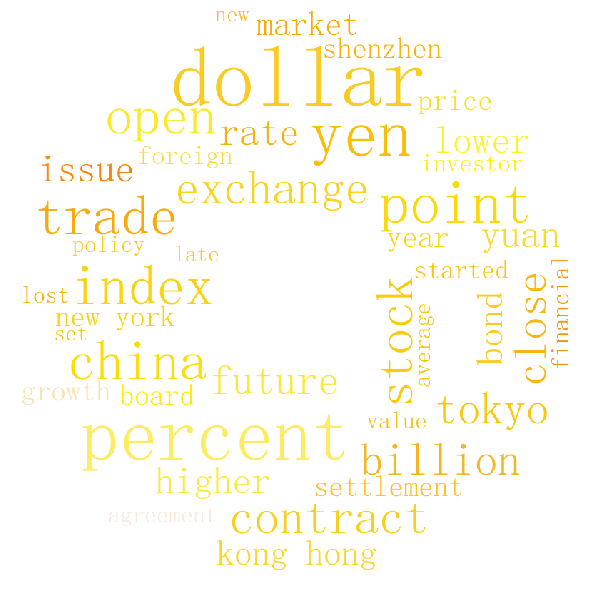

In [27]:
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image as Image

tf = {data.columns[i]: data.ix[41,i] for i in range(len(data))} #词频统计词典
coloring = np.array(Image.open("E:/graduate/class/Statistical Case Studies/homework3/pictures/jinbi.jpg")) #图片

my_wordcloud = WordCloud(background_color="white", max_words=2000,
                         mask=coloring, max_font_size=60, random_state=42, scale=2,
                         font_path=os.environ.get("FONT_PATH", "C:/Windows/Fonts/simfang.ttf"))
my_wordcloud.fit_words(tf)
image_colors = ImageColorGenerator(coloring)
plt.figure(figsize=(18.5,10.5)) 
plt.imshow(my_wordcloud.recolor(color_func=image_colors))
plt.xticks([]),plt.yticks([]) #隐藏坐标线 
plt.axis("off")
plt.imshow(my_wordcloud)
plt.show()